In [1]:
#-*-coding:utf-8 -*-
from __future__ import division, print_function, unicode_literals

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/fonts/malgun.ttf").get_name()
    rc('font', family=font_name)



In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] =12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['axes.unicode_minus']= False

# 4.1 선형회귀

$$ 삶의 만족도=\theta_0 +\theta_1*1인당GDP$$  
$\theta_0$과 $\theta_1$이 모델 파라미터이다. 일반적으로 선형모델은 입력 특성의 가중치 합과 편향이라는 상수를 더해 예측을 만든다.

$$\hat y=h_\theta (x)=\theta^T*X$$  
  
  
- $\theta$는 편향 $\theta_0$과 $\theta_1$에서 $\theta_n$까지의 특성 가중치를 담고 있는 모델의 파라미터 벡터이다.  
- $\theta^T$는 $\theta$의 전치이다.  
- X는 $x_0$에서 $x_n$까지 담고 있는 샘플의 **특성 벡터**입니다. $x_0$는 항상 1입니다.  
- $h_\theta$는 모델 파라미터 $\theta$를 사용한 가설 함수입니다.

회귀에서 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)이다. 선형회귀 모델을 훈련시키려면 RMSE를 최소화 하는 $\theta$를 찾아야 한다.

# 4.1.1 정규방정식


비용함수를 최소화 하는 $\theta$를 찾기 위한 해석적인 방법이 있다. 이를 **정규방정식**이라고 한다.

$$\hat \theta=(X^T*X)^-1*X^T*y$$

In [4]:
import numpy as np
import os

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [5]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.95153734],
       [3.07578931]])

In [10]:
np.array([[0],[2]])

array([[0],
       [2]])

In [7]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.95153734],
       [10.10311597]])

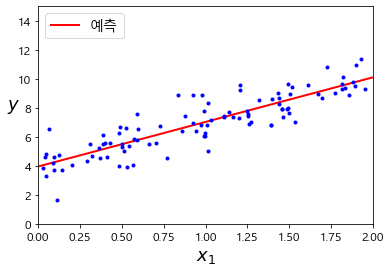

In [8]:
plt.plot(X_new,y_predict,"r-",linewidth=2, label="예측")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.95153734]), array([[3.07578931]]))

In [14]:
lin_reg.predict(X_new)

array([[ 3.95153734],
       [10.10311597]])

# 4.1.2 계산복잡도

계산 복잡도는 일반적으로 $O(n^2.4)$ 에서 $O(n^3)$ 사이입니다.

## 4.2 경사하강법
그래디언트( 비용함수의 미분값)이 0이 되면 최솟값이 되는것
학습률 파라미터로 결정되지만 너무 작게 잡으면 수렴하기까지 오래 걸리고 크게 잡으면 건너 뛸 수도 있게 된다 경사하강법이 다른 방법 보다 전역최솟값에 가깝게 접근 할 수 있게 하지만 반드시 모든 특성이 같은 스케일을 갖도록 해줘야 한다

경사하강법에서 가장 중요한 파라미터는 **학습률**하이퍼 파라미터로 결정 된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.  
무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하게 되면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴한다.  
다행히 선형 회귀를 위한 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 **볼록함수**이다.

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94865393]), array([[3.11072892]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.94865393],
       [10.17011178]])

In [11]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for interation in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta= theta - eta*gradients

In [12]:
theta

array([[3.94865393],
       [3.11072892]])

## 4.2.2 확률적 경사 하강법

- 배치하강법의 가장 큰 문제는 매 스템에서 전체 훈련 세트를 사용해 그래디언트를 계산한다는 사실  
- **확률적 경사하강법**은 매 스템에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산한다.  
- 매 반복에서 매우 작은 데이터만 처리하기 때문에 알고리즘이 훨씬 빠르다.   
- 확률적이기 때문에 배치 경사하강법보다 훨씬 불안정하다.  
- 전역 최솟값에 다다르지 못할 수도 있다.

In [13]:
n_epochs=50
t0, t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi= X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients= 2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients


In [14]:
theta

array([[3.95764098],
       [3.0862861 ]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88781036]), array([3.08082975]))

# 4.2.3 미니배치 경사 하강법

- 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산  
- 행렬 연산에 최적화된 하드웨어, 즉 GPU를 사용해서 얻는 성능향상이 장점  
- 미니배치 경사하강법이 SGD 보다 최솟값에 더 가까이 도달하게 되지만 최솟값에서 빠져나오기는 더 힘들지도 모른다.

|알고리즘|m이 클 때|외부 메모리 학습 지원|n이 클 때|하이퍼파라미터 수|스케일 조정 필요|사이킷런|
| :--- | :--- | :--- | :--- | :--- | :--- | :---
|정규방정식|빠름|No|느림|0|No|LinearRegression|
|배치 경사 하강법|느림|No|빠름|2|Yes|n/a|
|확률적 경사 하강법|빠름|Yes|빠름|>=2|Yes|SGDRegressor|
|미니배치 경사 하강법|빠름|Yes|빠름|>=2|Yes|n/a|

# 4.3 다항 회귀

#### 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는것

In [17]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]



array([-1.59733157])

In [19]:
X_poly[0]

array([-1.59733157,  2.55146813])

In [20]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.82581709]), array([[1.05148926, 0.47795688]]))

**학습곡선**을 살펴보는 것이다. 이 그래프는 훈련세트와 검증세트의 모델 성능을 훈련세트 크기의 함수로 나타낸다.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val,y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict= model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="훈련 세트")
    plt.plot(np.sqrt(val_errors),"b-", linewidth=3, label="검증 세트")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("훈련 세트 크기", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)  

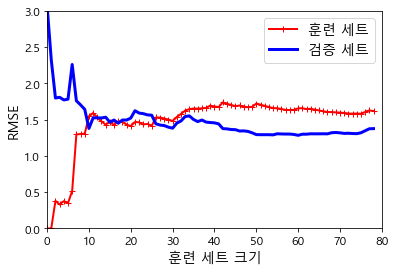

In [22]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3])

plt.show()

훈련세트에 샘플이 추가됨에 따라 노이즈도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는것이 불가능

모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화 될 수 없어 검증 오차가 처음엔 매우 크다.

모델에 훈련샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다.

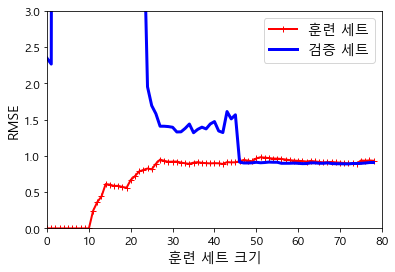

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()

- 훈련데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.

- 두 곡선 사이에 공간이 있다 = 훈련데이터에서의 모델 성능이 검증 데이터에서 보다 훨씬 낫다는 뜻이고 이는 과대적합 모델의 특징이다.

- 더 큰 훈련세트를 사용하면 두 곡선이 점점 가까워진다.

- **편향** : 일반화 오차 중에서도 편향은 잘못된 가정으로 인한 것이다. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우. 편향이 큰 모델은 훈련데이터에 과소적합되기 쉽다.  
- **분산** : 분산은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다. 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다.  
- **줄일 수 없는 오차** : 데이터 자체에 있는 노이즈 때문에 발생한다. 오차를 줄일 수 있는 유일한 방법은 데이터에서 노이즈를 제거하는 것이다.  
  
모델 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다. 반대로 모델 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. 그래서 **트레이드 오프**라고 한다.

# 4.5 규제가 있는 선형 모델

#### 과대적합을 줄이는 좋은 방법은 모델을 규제 하는 것 

#### 선형 회귀 모델에서는 보통 가중치를 제한 하는 규제를 한다. ex) 릿지 회귀, 라쏘 회귀, 엘라스틱 넷

# 4.5.1 릿지 회귀



$$ J(\theta)= MSE(\theta) + \alpha \frac{1}{2}\sum (\theta_i)^2 $$

$\alpha$=0 이면 릿지회귀는 선형 회귀와 같아진다. $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.  
릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전의 데이터에 스케일을 맞추는 것이 중요하다. 규제가 있는 모델은 거의 그렇다.

In [24]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1 , solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.96554403]])

In [25]:
sgd_reg=SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([4.30457188])

# 4.5.2 라쏘 회귀

덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 점이 특징 $\ l_2$ 노름 대신 $\ l_1$ 노름을 사용  
라쏘는 자동으로 특성을 선택하고 희소모델을 만든다.
  
$$ J(\theta)=MSE(\theta) + \alpha\sum \vert\theta_i\vert$$

In [26]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.93119773])

# 4.5.3 엘라스틱넷

- 라쏘와 릿지를 절충한 모델  
- 릿지와 회귀의 규제항을 더해서 쓰며 혼합정도는 혼합 비율 r을 사용해 조절한다.
- r=1이면 라쏘 회귀와 같고 r=0이면 릿지 회귀와 같다  
- 릿지가 기본이지만 실제로 쓰이는 특성이 몇개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.  
- 특성수가 훈련 샘플 수보다 많거나 몇개가 강하게 연관되어 있을때는 보통 라쏘가 문제를 일으킨다 그러므로 엘라스틱넷 선호  
  
$$ J(\theta)= MSE(\theta)+r\alpha\sum\vert\theta_i\vert + \frac{1-r}{2} \alpha\sum\theta_i^2 $$



In [27]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.92959656])

# 4.5.4 조기종료

#### 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것이다

In [53]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler=Pipeline([
    ("poly_features",PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler",StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg =SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                     learning_rate="constant", eta0=0.0005)

minimum_val_error=float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\s

# 4.6 로지스틱 회귀

## 4.6.1 확률 추정

- 추정 확률이 50% 가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측하고 아니면 속하지 않는다고 예측한다.  

- 양수일때 1이라고 예측하고 음수일땐 0이라고 예측  
  
$ \hat p= h_\theta(x) = \sigma(\theta^T *x)$ 로지스틱은 0과 1 사이를 출력하는 시그모이드 함수이다.  




## 4.6.2 훈련과 비용 함수

## 4.6.3 결정 경계

In [29]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [30]:
X=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

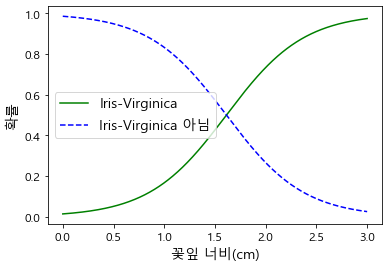

In [47]:
import matplotlib.pyplot as plt
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Iris-Virginica 아님")
plt.ylabel("확률",fontsize="14")
plt.xlabel("꽃잎 너비(cm)",fontsize="14")
plt.legend(loc= "center left",fontsize="14")

plt.show()



In [33]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## 4.6.4 소프트 맥스 회귀

샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $\ S_k(x)$를 계산하고, 그 점수에 소프트 맥스 함수를 적용하여 각 클래스의 확률을 추정한다.  
$$ s_k(x)=(\theta^(k))^T * x $$
샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 $\hat p_k$을 추정할 수 있다. 이 함수는 각 점수에 지수 함수를 적용한 후 정규화 한다.  
$$ p_k\hat = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum exp(s_j(x))}$$
  
- K는 클래스 수 입니다.  
- $s(x)$는 샘플 x에 대한 각 클래스의 점수를 담고 있는 벡터입니다.  
- $\sigma(s(x))_k$는 샘플 x에 대한 각 클래스의 점수가 주어졌을때 이 샘플이 클래스 k에 속할 추정 확률입니다.  
- 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측합니다. 그래서 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야 한다.

In [ ]:
X=iris["data"][:,(2,3)]
y=iris["target"]
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

In [ ]:
softmax_reg.predict([[5,2]])

In [ ]:
softmax_reg.predict_proba([[5,2]])